# Scikit-Learn Jupyter Notebook

[Offical Documentation](https://scikit-learn.org/stable/)

***

## Python libaries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

## Plot styles 

In [2]:
#default plot style
plt.style.use('fivethirtyeight')

#default plot size
plt.rcParams['figure.figsize'] = [12, 6]

***

### Building a k-Nearest-Neighbors (k-NN) Model with Scikit-learn

* https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a

[link to aticle](https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a)

#### Reading in dataset

In [3]:
import pandas as pd

#read in the data using pandas
df = pd.read_csv('F:\Desktop\HDip\Machine_Learning\Data\diabetes_data.txt')

#check data has been read in properly
df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


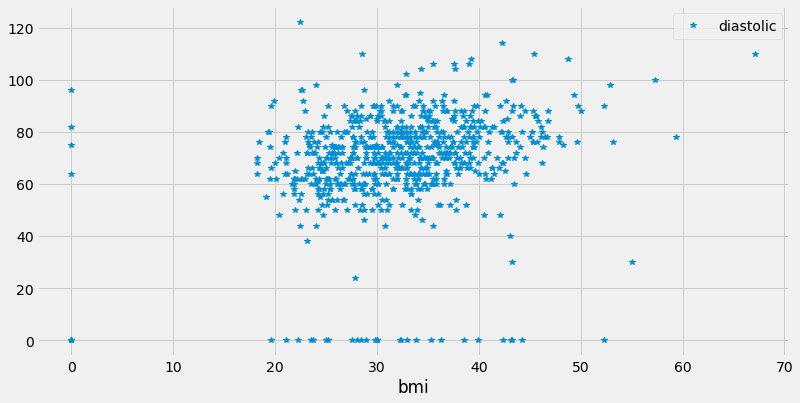

In [4]:
df.plot(x='bmi',y='diastolic',style='*');

#### How much data there is - number of rows and columns

In [5]:
df.shape

(768, 9)

#### Split up the dataset into inputs and targets
The input will be every column except ‘diabetes’ because ‘diabetes’ is what we will be attempting to predict. 
Therefore, ‘diabetes’ will be our target.

In [6]:
#create a dataframe with all training data except the target column
X = df.drop(columns=["diabetes"])
#check that the target variable has been removed
X.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


Insert the ‘diabetes’ column of our dataset into our target variable (y).

In [7]:
#separate target values
y = df['diabetes'].values
#view target values
y[0:5]

array([1, 0, 1, 0, 1], dtype=int64)

#### Split the dataset into train and test data
Now we will split the dataset into into training data and testing data. The training data is the data that the model will learn from. The testing data is the data we will use to see how well the model performs on unseen data.

In [8]:
from sklearn.model_selection import train_test_split
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

#### train_test_split function explanation
* takes in 5 parameters. 

* The first two parameters are the input and target data we split up earlier. 

* ‘test_size’ to 0.2. This means that 20% of all the data will be used for testing, which leaves 80% of the data as training data for the model to learn from. 

* Setting ‘random_state’ to 1 ensures that we get the same split each time so we can reproduce our results.

* Setting ‘stratify’ to y makes our training split represent the proportion of each value in the y variable. For example, in our dataset, if 25% of patients have diabetes and 75% don’t have diabetes, setting ‘stratify’ to y will ensure that the random split has 25% of patients with diabetes and 75% of patients without diabetes.

#### Building and training the model

In [9]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

* First, we will create a new k-NN classifier and set ‘n_neighbors’ to 3. To recap, this means that if at least 2 out of the 3 nearest points to an new data point are patients without diabetes, then the new data point will be labeled as ‘no diabetes’, and vice versa. In other words, a new data point is labeled with by majority from the 3 nearest points.

* We have set ‘n_neighbors’ to 3 as a starting point. We will go into more detail below on how to better select a value for ‘n_neighbors’ so that the model can improve its performance.

* Next, we need to train the model. In order to train our new model, we will use the ‘fit’ function and pass in our training data as parameters to fit our model to the training data.

#### Testing the model

* Once the model is trained, we can use the ‘predict’ function on our model to make predictions on our test data. 

* As seen when inspecting ‘y’ earlier, 0 indicates that the patient does not have diabetes and 1 indicates that the patient does have diabetes. 

* To save space, we will only show print the first 5 predictions of our test set.

In [10]:
#show first 5 model predictions on the test data
knn.predict(X_test)[0:5]

array([0, 0, 0, 0, 1], dtype=int64)

* model predicted ‘no diabetes’ for the first 4 patients in the test set and ‘has diabetes’ for the 5th patient.

* let’s see how our accurate our model is on the full test set. 

* use the ‘score’ function and pass in our test input and target data to see how well our model predictions match up to the actual results.

In [11]:
#check accuracy of our model on the test data
knn.score(X_test, y_test)

0.6688311688311688

#### k-Fold Cross-Validation

* Cross-validation is when the dataset is randomly split up into ‘k’ groups. 
* One of the groups is used as the test set and the rest are used as the training set. 
* The model is trained on the training set and scored on the test set. 
* Then the process is repeated until each unique group as been used as the test set.
* For example, for 5-fold cross validation, the dataset would be split into 5 groups, and the model would be trained and tested 5 separate times so each group would get a chance to be the test set.

* The train-test-split method we used in earlier is called ‘holdout’. 
* Cross-validation is better than using the holdout method because the holdout method score is dependent on how the data is split into train and test sets. * Cross-validation gives the model an opportunity to test on multiple splits so we can get a better idea on how the model will perform on unseen data.

* In order to train and test our model using cross-validation, we will use the ‘cross_val_score’ function with a cross-validation value of 5. * ‘cross_val_score’ takes in our k-NN model and our data as parameters. Then it splits our data into 5 groups and fits and scores our data 5 seperate times, recording the accuracy score in an array each time. 
* We will save the accuracy scores in the ‘cv_scores’ variable.
* To find the average of the 5 scores, we will use numpy’s mean function, passing in ‘cv_score’. Numpy is a useful math library in Python.

In [41]:
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=14)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X, y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.75974026 0.72077922 0.75974026 0.81045752 0.73856209]
cv_scores mean:0.7578558696205755


* Using cross-validation, our mean score is about 71.36%. 
* This is a more accurate representation of how our model will perform on unseen data than our earlier testing using the holdout method.

#### Hypertuning model parameters using GridSearchCV
* When built our initial k-NN model, we set the parameter ‘n_neighbors’ to 3 as a starting point with no real logic behind that choice.
* Hypertuning parameters is when you go through a process to find the optimal parameters for your model to improve accuracy. 
* In our case, we will use GridSearchCV to find the optimal value for ‘n_neighbors’.
* GridSearchCV works by training our model multiple times on a range of parameters that we specify. That way, we can test our model with each parameter and figure out the optimal values to get the best accuracy results.
* For our model, we will specify a range of values for ‘n_neighbors’ in order to see which value works best for our model. 
* To do this, we will create a dictionary, setting ‘n_neighbors’ as the key and using numpy to create an array of values from 1 to 24.
* Our new model using grid search will take in a new k-NN classifier, our param_grid and a cross-validation value of 5 in order to find the optimal value for ‘n_neighbors’.

In [13]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [14]:
knn_gscv

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

* After training, we can check which of our values for ‘n_neighbors’ that we tested performed the best. 
* To do this, we will call ‘best_params_’ on our model.

In [15]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 14}

* We can see that 14 is the optimal value for ‘n_neighbors’. 
* We can use the ‘best_score_’ function to check the accuracy of our model when ‘n_neighbors’ is 14. ‘best_score_’ outputs the mean accuracy of the scores obtained through cross-validation.

In [16]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.7578558696205755

* By using grid search to find the optimal parameter for our model, we have improved our model accuracy by over 4%!

***

### KNN nearest neightbours Iris

* load in iris data set

In [17]:
#load iris dataset
df = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/datasets/master/iris.csv")
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


* visualise with pairplot, hue being species

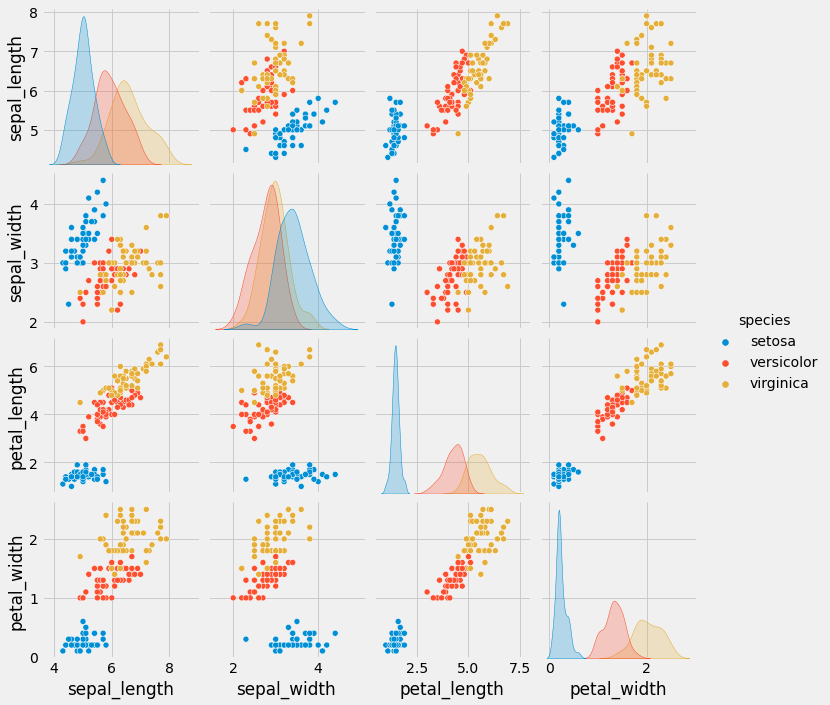

In [18]:
sns.pairplot(df,hue="species");

### Inputs and Outputs

* Data being split up into inouts and targets. 
* The species type is what is trying to be predicted. 
* This is takien out of the main dateaet simailar to the article above based on doabetes data

In [19]:
inputs= df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
outputs = df['species']

### Classifier

In [51]:
knn = KNeighborsClassifier(n_neighbors = 6)

### Fit

In [52]:
knn.fit(inputs,outputs)

KNeighborsClassifier(n_neighbors=6)

### Test fit

In [53]:
print(df.loc[5])
print('')
print(df.loc[120])

sepal_length       5.4
sepal_width        3.9
petal_length       1.7
petal_width        0.4
species         setosa
Name: 5, dtype: object

sepal_length          6.9
sepal_width           3.2
petal_length          5.7
petal_width           2.3
species         virginica
Name: 120, dtype: object


In [54]:
knn.predict([[5.4,3.9,1.7,0.4],[6.9,3.2,5.7,2.3]])

array(['setosa', 'virginica'], dtype=object)

### Evaluate

In [55]:
(knn.predict(inputs) == outputs).sum()

146

In [56]:
(knn.predict(inputs) == outputs).value_counts()

True     146
False      4
Name: species, dtype: int64

### Train data

In [104]:
inputs_train, inputs_test, outputs_train, outputs_test = train_test_split(inputs,outputs,test_size=0.33)

In [105]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(inputs_train,outputs_train)

KNeighborsClassifier(n_neighbors=6)

In [106]:
(knn.predict(inputs_test) == outputs_test).sum()

45

In [107]:
(knn.predict(inputs_test) == outputs_test).value_counts()

True     45
False     5
Name: species, dtype: int64

### k-Fold Cross-Validation

In [108]:
from sklearn.model_selection import cross_val_score

#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=5)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, inputs,outputs, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.96666667 1.         0.93333333 0.96666667 1.        ]
cv_scores mean:0.9733333333333334


### GridSearch

In [109]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn3 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn3, param_grid, cv=5)
#fit model to data
knn_gscv.fit(inputs,outputs)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

#### Best value to use

In [110]:
knn_gscv.best_params_

{'n_neighbors': 6}

* n_neightbour value of 6 the optium value to use post cross validation

In [111]:
knn_gscv.best_score_

0.9800000000000001

In [112]:
knn_gscv.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [113]:
for i in ['mean_test_score', 'rank_test_score', 'params']:
    print(i," : ",knn_gscv.cv_results_[i])

mean_test_score  :  [0.96       0.94666667 0.96666667 0.97333333 0.97333333 0.98
 0.98       0.96666667 0.97333333 0.98       0.98       0.98
 0.97333333 0.96666667 0.96666667 0.96666667 0.96666667 0.96666667
 0.96666667 0.96       0.96666667 0.96       0.96       0.94666667]
rank_test_score  :  [19 24 10  6  6  1  1 10  6  1  1  1  6 17 10 10 10 17 10 19 10 19 19 23]
params  :  [{'n_neighbors': 1}, {'n_neighbors': 2}, {'n_neighbors': 3}, {'n_neighbors': 4}, {'n_neighbors': 5}, {'n_neighbors': 6}, {'n_neighbors': 7}, {'n_neighbors': 8}, {'n_neighbors': 9}, {'n_neighbors': 10}, {'n_neighbors': 11}, {'n_neighbors': 12}, {'n_neighbors': 13}, {'n_neighbors': 14}, {'n_neighbors': 15}, {'n_neighbors': 16}, {'n_neighbors': 17}, {'n_neighbors': 18}, {'n_neighbors': 19}, {'n_neighbors': 20}, {'n_neighbors': 21}, {'n_neighbors': 22}, {'n_neighbors': 23}, {'n_neighbors': 24}]


## References

* https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a

***
# End